In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e14/train.csv")
train_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [6]:
test_data = pd.read_csv("/kaggle/input/playground-series-s3e14/test.csv")
test_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [7]:
test_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [8]:
train_data.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [9]:
train_data.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, r2_score, mean_squared_error, mean_absolute_error

In [12]:
train_data.corr()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,1.000000,0.003041,0.013690,0.003244,0.008948,0.004693,0.009528,0.009613,0.009504,0.009756,0.009544,0.009608,0.002340,0.001703,0.006061,0.004760,0.000867,0.000975
clonesize,0.003041,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.013690,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bumbles,0.003244,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
andrena,0.008948,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
osmia,0.004693,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
MaxOfUpperTRange,0.009528,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963,-0.022517
MinOfUpperTRange,0.009613,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
AverageOfUpperTRange,0.009504,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082,-0.021940
MaxOfLowerTRange,0.009756,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197


<AxesSubplot: xlabel='honeybee', ylabel='yield'>

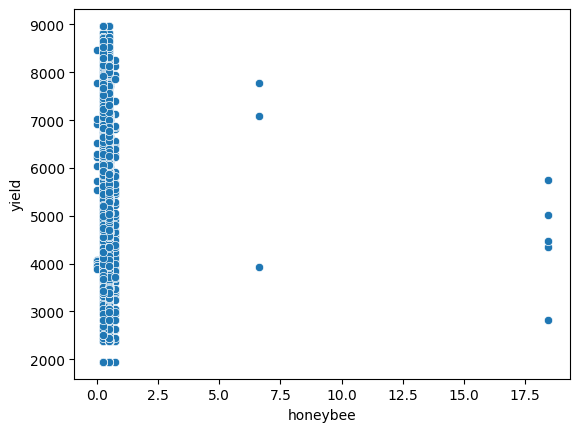

In [13]:
sns.scatterplot(y = train_data["yield"], x = train_data ["honeybee"])

<AxesSubplot: xlabel='honeybee', ylabel='yield'>

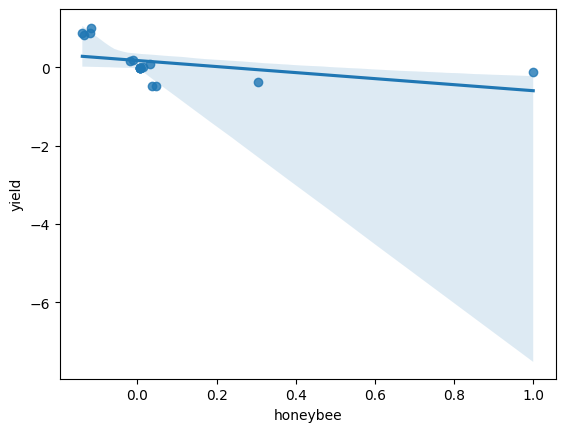

In [14]:
sns.regplot(y = train_data.corr()["yield"], x = train_data.corr() ["honeybee"])

In [15]:
#Method of finding outliers

print("Highest allowed", train_data["honeybee"].mean() + 3*train_data["honeybee"].std())
print("Lowest allowed",train_data["honeybee"].mean()- 3*train_data["honeybee"].std())

Highest allowed 1.4742435742990594
Lowest allowed -0.6956150178205456


In [16]:
new_data = train_data[(train_data["honeybee"] < 1.47424) & (train_data["honeybee"] > -0.6956)]
new_data

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


/tmp/ipykernel_20/4003262365.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["honeybee"])


<AxesSubplot: xlabel='honeybee', ylabel='Density'>

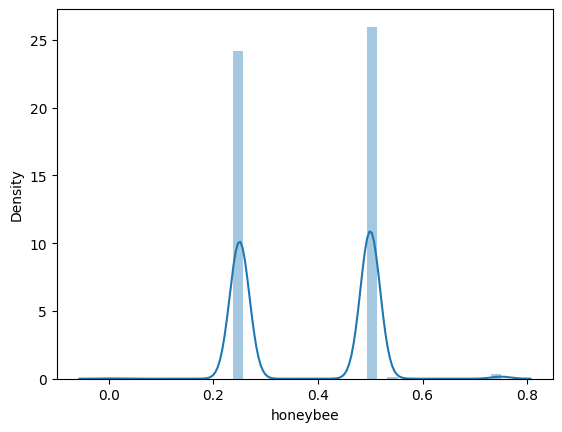

In [17]:
sns.distplot(new_data["honeybee"])

In [18]:
#deleting id and yield from data

X=new_data.drop(columns=["id","yield"])
X.shape

(15281, 16)

In [19]:
X

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059
15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243


In [20]:

Y=new_data["yield"]
Y.shape

(15281,)

In [21]:
Y


0        4476.81146
1        5548.12201
2        6869.77760
3        6880.77590
4        7479.93417
            ...    
15284    7667.83619
15285    3680.56025
15286    4696.44394
15287    6772.93347
15288    5867.99722
Name: yield, Length: 15281, dtype: float64

In [22]:
#mean of 0 and sd of 1

normalized_data=(X-X.mean())/X.std()
normalized_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.802716,0.913560,-0.617183,1.738761,-0.665822,-1.363005,-1.365122,-1.367977,-1.365592,-1.364332,-1.366622,0.457833,0.401315,-1.045592,-0.784601,-0.920187
1,0.802716,0.913560,-0.617183,0.048483,-0.665822,-1.363005,-1.365122,-1.367977,-1.365592,-1.364332,-1.366622,0.457833,0.401315,-0.778025,-0.662852,-0.573317
2,-1.092104,-1.024974,-0.617183,0.927428,0.269133,0.418691,0.419449,0.424423,0.419040,0.419133,0.413909,0.457833,0.401315,0.674533,0.655739,0.539567
3,-1.092104,-1.024974,-0.617183,0.927428,-0.665822,-0.521345,-0.517901,-0.517568,-0.518648,-0.519533,-0.513451,0.457833,0.401315,0.850015,0.852539,0.819007
4,0.802716,0.913560,-0.617183,0.927428,0.269133,-0.521345,-0.517901,-0.517568,-0.518648,-0.519533,-0.513451,0.457833,0.401315,1.034245,1.285613,1.071435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,-1.092104,-1.024974,-0.617183,-0.762850,-0.665822,-0.521345,-0.517901,-0.517568,-0.518648,-0.519533,-0.513451,-0.228517,-0.392109,0.719917,0.803144,1.086816
15285,-1.092104,-1.024974,-0.617183,-1.641794,-0.665822,0.418691,0.419449,0.424423,0.419040,0.419133,0.413909,1.315770,1.438870,-1.994942,-1.578976,-1.663221
15286,0.802716,0.913560,-0.617183,-0.762850,1.132169,-0.521345,-0.517901,-0.517568,-0.518648,-0.519533,-0.513451,1.315770,1.438870,-1.078715,-0.805131,-0.960356
15287,0.802716,0.913560,-0.617183,0.927428,0.269133,-1.363005,-1.365122,-1.367977,-1.365592,-1.364332,-1.366622,0.457833,0.401315,0.529885,-0.336426,0.125651


In [23]:
model = RandomForestRegressor(n_estimators = 250, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X, Y)

RandomForestRegressor(n_estimators=250, random_state=0)

In [24]:
X_test=test_data.drop(columns="id")

In [25]:
#normalized test data

X_testn=(X_test-X_test.mean())/X_test.std()
X_testn

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.789464,-0.363070,-0.606473,-1.628765,-2.453385,0.414378,0.414747,0.420023,0.414616,0.414354,0.409089,0.466265,0.408236,-1.371251,-1.032459,-1.179581
1,-1.106813,-0.363070,-0.606473,1.745819,0.262894,1.353915,1.351299,1.348416,1.351589,1.352357,1.354270,-1.486184,-1.345706,-0.184198,-0.093893,0.176773
2,-1.106813,-0.363070,-0.606473,0.935919,0.262894,0.414378,0.414747,0.420023,0.414616,0.414354,0.409089,-0.212848,-0.378014,1.091868,1.098726,0.970499
3,0.789464,0.277919,1.565024,-0.751373,0.262894,0.414378,0.414747,0.420023,0.414616,0.414354,0.409089,-0.212848,-0.378014,-0.920859,-0.634160,-0.751329
4,2.685741,0.918908,-0.606473,-1.628765,-2.453385,1.353915,1.351299,1.348416,1.351589,1.352357,1.354270,0.466265,0.408236,-1.884877,-1.551373,-1.636447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,0.789464,-0.363070,-0.606473,-1.628765,-2.453385,0.414378,0.414747,0.420023,0.414616,0.414354,0.409089,0.466265,0.408236,-0.370066,-0.227290,-0.400780
10190,0.789464,0.277919,-0.606473,0.058527,1.120667,-0.525159,-0.521804,-0.521445,-0.522357,-0.523650,-0.517560,-0.212848,-0.378014,-0.253720,-0.152996,-0.121428
10191,0.789464,0.277919,1.565024,0.058527,-0.666359,-0.525159,-0.521804,-0.521445,-0.522357,-0.523650,-0.517560,-0.212848,-0.378014,0.897439,0.451231,0.395129
10192,-1.106813,-0.363070,-0.606473,-0.751373,-0.666359,1.353915,1.351299,1.348416,1.351589,1.352357,1.354270,1.315156,1.436410,-1.264078,-1.000816,-1.058364


In [26]:
predict=model.predict(X_test)

In [27]:
predict = pd.DataFrame(predict)
predict = predict.head(15281)

In [28]:
r2 = r2_score(Y[:len(predict)], predict)
print("R2 Score:", r2)

R2 Score: -0.8427633795641374
